<a href="https://colab.research.google.com/github/sonhs99/MachineLearning/blob/master/Assignment05/Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assginment05
---

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.txt to data.txt
User uploaded file "data.txt" with length 3775 bytes


1. Plot the training data

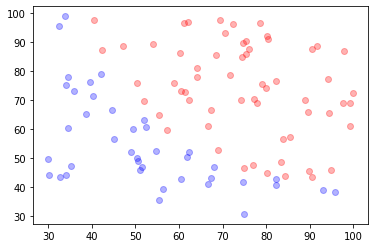

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

2. Plot the estimated parameters

In [0]:
def sigmoid(x):
  return np.reciprocal(1 + np.exp(-x))

def energy(theta, data, label):
  temp = sigmoid(data@theta)
  return -(label*np.log(temp) + (1 - label)*np.log(1 - temp)).mean()

In [36]:
theta = [np.array([1.0,1.0,1.0])]
e = [0]
n_data = np.array([np.full(len(x), 1), x, y]).transpose()
tmp = energy(theta[-1], n_data, label)
alpha = 0.0015

while tmp != e[-1]:
  e.append(tmp)
  theta.append(theta[-1].copy())

  temp = sigmoid(n_data@theta[-1]) - label
  temp2 = n_data.transpose()@temp
  theta[-1] -= alpha*temp2/len(n_data)
  tmp = energy(theta[-1], n_data, label)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


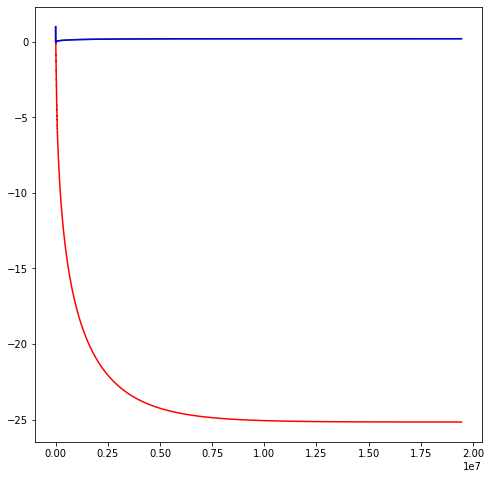

In [37]:
plt.figure(figsize=(8, 8))
plt.plot(range(0, len(theta)), [t[0] for t in theta], c='r')
plt.plot(range(0, len(theta)), [t[1] for t in theta], c='g')
plt.plot(range(0, len(theta)), [t[2] for t in theta], c='b')
plt.show()

In [0]:
plt.figure(figsize=(8, 8))
plt.plot(range(1, len(e)), e[1:], c='k')
plt.show()

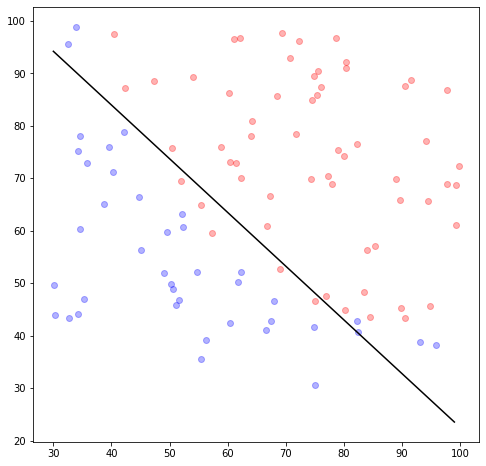

In [0]:
x = np.array(range(30, 100))
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.plot(x,  -(theta[-1][0] + theta[-1][1]*x)/theta[-1][2], c='k')
plt.show()

In [0]:
print(theta[-1])

[-25.15991657   0.20622038   0.20146014]
